# Verb Noun Ratio through MCA

All the feature sets in this notebook are subsets of:

	
    82A	Order of Subject and Verb
    
    83A	Order of Object and Verb	

    84A	Order of Object, Oblique, and Verb	
    
    85A	Order of Adposition and Noun Phrase	Matthew	

    86A	Order of Genitive and Noun	

    87A	Order of Adjective and Noun	

    88A	Order of Demonstrative and Nou

    89A	Order of Numeral and Noun

    90A	Order of Relative Clause and Noun

    91A	Order of Degree Word and Adjective

    92A	Position of Polar Question Particles

    93A	Position of Interrogative Phrases in Content Questions

    94A	Order of Adverbial Subordinator and Clause

    143A	Order of Negative Morpheme and Verb	

    144A	Position of Negative Word With Respect to Subject, Object, and Verb

With the requirement of at least 20 languages with known verb/noun ratio.

Examples 1 - 5 are the top 5 of these sets, in terms of the best silhoutte computed by
 
 - high v/n ratio
 - low v/n ratio
 - medium v/n ratio

"best" means optimized for number of mca dimensions to use in the distance computation.

All silhouette scores are 0.5+ and quality indices are 4+

quality index:
max eigenvalue * number of categories / sum of all eigenvalues

categories - possible values of a variable i.e a WALS  feature.

In [5]:
library(FactoMineR)
example1 <- read.csv('chunked-feature-sets/top-1silhouettes-on-diverse-wo.csv')
example1$X <- NULL
dim(example1)

[1] 569  19

In [5]:
knownratios = which(example1$verb.noun.ratio != 'unknown')
example1[c(62),'Name']

[1] Basque
569 Levels: Abkhaz Abui Abun Acehnese Achang Adang Adioukrou ... Zuni

In [16]:
example1[0:1,]

verb.noun.ratio,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,X82A,X83A,X85A,X86A,X87A,X88A,X89A,X93A
unknown,abk,abk,abkh1244,Abkhaz,43.08333,41,Northwest Caucasian,Northwest Caucasian,Eurasia,GE,1 SV,1 OV,1 Postpositions,1 Genitive-Noun,2 Noun-Adjective,1 Demonstrative-Noun,3 No dominant order,2 Not initial interrogative phrase


In [17]:
knownratios = which(example1$verb.noun.ratio != 'unknown')
mca <- MCA(example1,quali.sup=1:11)

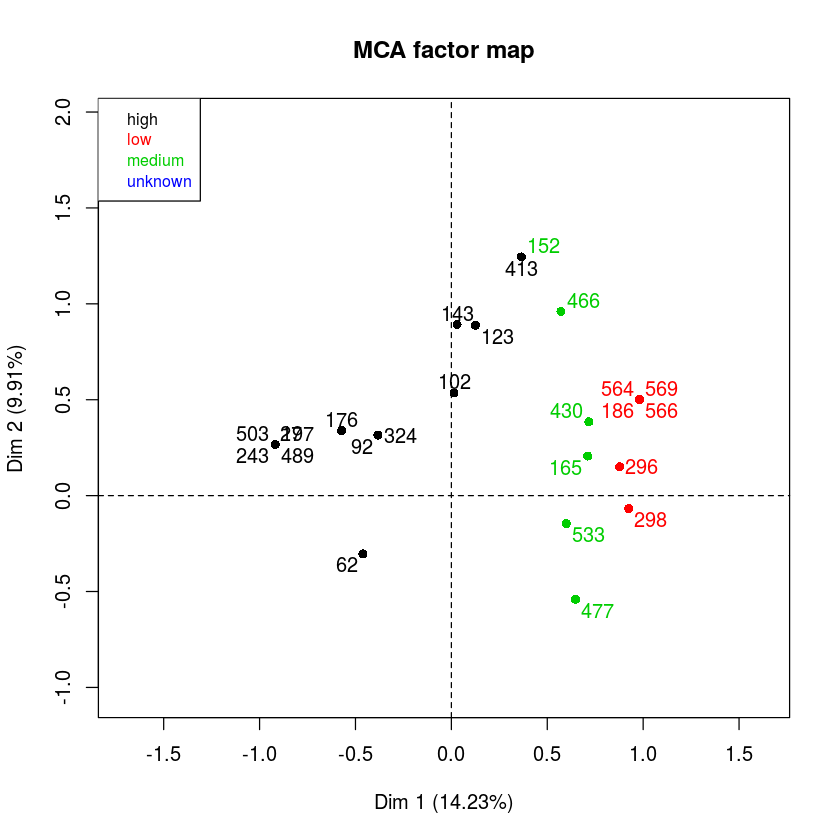

In [18]:
plot(mca,choix="ind",habillage="verb.noun.ratio",invisible=c("var","quali.sup"),select=knownratios,unselect=1)

In [5]:
mca$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X82A,0.25839437,0.37836767,0.220217331,0.04295772,0.019227491
X83A,0.74166312,0.04141573,0.270991719,0.04813078,0.021319504
X85A,0.80716679,0.05121086,0.335827622,0.29928816,0.541593463
X86A,0.72812412,0.02507984,0.097091189,0.07422557,0.003385266
X87A,0.22477240,0.31008040,0.239684257,0.11227615,0.043699442
X88A,0.42036358,0.34467471,0.093139015,0.47874207,0.574639838
X89A,0.01837915,0.67720557,0.082489107,0.18328096,0.005633400
X93A,0.07375978,0.45084975,0.004572253,0.01865261,0.003309581


## So here the leading features are:

 * 83A - order of object and verb
 
 * 85A - order of adposition and noun phrase
 
 * 86A - order of genitive and noun

In [6]:
example1[c(152,413),]['Name']

,Name
152,Greek (Modern)
413,Polish


Note that if we look at the ratios table in Polinsky's paper we see that Polish is at the very bottom of the high group while Greek is at the top of the middle group.
We expect Spanish not to be in this set.

In [7]:
grep("Spanish",example1$Name)

[1] 466

Sadly it is there, but at least it's close to polish and Greek, which makes sense.

In [14]:
example2 <- read.csv('chunked-feature-sets/top-2silhouettes-on-diverse-wo.csv')
example2$X <- NULL
mca <- MCA(example2,quali.sup=1:11)

In [15]:
mca$var$eta

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X82A,0.27690694,0.4319244,0.28093883,0.023205522,0.065157008
X83A,0.75774151,0.1638095,0.24293731,0.004459773,0.009782116
X85A,0.81457670,0.1667859,0.17638915,0.489587640,0.469096608
X86A,0.74088608,0.1294123,0.09043785,0.014218882,0.029591126
X87A,0.17683340,0.2372019,0.27181036,0.144660220,0.031012471
X88A,0.36828128,0.3243517,0.13512072,0.541667549,0.482438389
X93A,0.07577286,0.4374284,0.08100632,0.004259114,0.115623896


In [16]:
mca$var$contrib

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X82A_1 SV,1.643175e+00,3.615884e+00,1.06476591,1.449702e-02,1.255807e-03
X82A_2 VS,6.750958e+00,3.486261e+00,14.75163453,2.569672e-01,1.330548e+00
X82A_3 No dominant order,2.295685e-01,1.573995e+01,6.15528114,1.627423e+00,4.085750e+00
X83A_1 OV,1.249889e+01,1.026380e+00,0.60903449,2.101594e-01,9.092638e-02
X83A_2 VO,1.096031e+01,5.173920e-05,0.46899548,1.443768e-01,4.695892e-05
X83A_3 No dominant order,1.391037e-01,7.636548e+00,17.92162599,1.040311e-02,7.223718e-01
1 Postpositions,1.235695e+01,2.928239e-01,0.32639049,9.029277e-02,1.090287e+00
2 Prepositions,1.283036e+01,8.775609e-03,0.64978546,2.836328e-01,7.116585e-01
3 Inpositions,3.628827e-02,3.798637e-01,0.71605290,2.195419e+01,1.637474e+01
4 No dominant order,1.028911e-04,1.215368e-04,4.00745789,1.617986e+01,2.028251e+01


In [27]:
which(example2$Name %in% c('Polish','Czech'))

[1] 107 437

Same

In [12]:
example3 <- read.csv('chunked-feature-sets/top-3silhouettes-on-diverse-wo.csv')
example3$X <- NULL
mca <- MCA(example3,quali.sup=1:11)
mca$var$eta

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X82A,0.2365606,0.4155453,0.28818127,0.002357143,0.0133932412
X83A,0.7676774,0.3122285,0.22686747,0.004728466,0.0248932111
X85A,0.8265236,0.2593413,0.10989279,0.451331273,0.5671382430
X86A,0.7596290,0.1880838,0.05435717,0.041738178,0.0006940646
X87A,0.1776025,0.2109063,0.36244271,0.092333961,0.2344664503
X88A,0.3422222,0.2451646,0.25076470,0.575443201,0.3032655119


In [13]:
example4<- read.csv('chunked-feature-sets/top-4silhouettes-on-diverse-wo.csv')
example4$X <- NULL
mca <- MCA(example4,quali.sup=1:11)
mca$var$eta

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X82A,0.31264520,0.3797366,0.0078349090,0.1207075,0.21111770
X83A,0.80452129,0.4734831,0.0531830970,0.0052099,0.02394935
X85A,0.86254812,0.3247160,0.5956700054,0.6368415,0.18622195
X86A,0.78148664,0.2223237,0.0005031785,0.1505367,0.05834398
X87A,0.07671348,0.0751783,0.4598498910,0.1558894,0.54005984


In [14]:
example5 <- read.csv('chunked-feature-sets/top-5silhouettes-on-diverse-wo.csv')
example5$X <- NULL
mca <- MCA(example5,quali.sup=1:11)
mca$var$eta

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X82A,0.30856477,0.28539144,0.2943842,0.020568565,0.02644514
X83A,0.80213155,0.04381513,0.3734135,0.004346708,0.02579669
X85A,0.86229603,0.04382453,0.2372450,0.312036402,0.40999920
X86A,0.77963643,0.02113048,0.1166732,0.065180677,0.11141533
X87A,0.09293185,0.52923755,0.1799182,0.419237544,0.48712687
X89A,0.00386954,0.74784462,0.1131640,0.314138591,0.06082458


#### So the top 5 in terms of sihouette are all relying primarily on the same three features (83A,85A,86A).

### Averaging DIM1 eta2's over 2000 feature sets we get:
   
   - 143A: 0.19993978067524021
   
   - 144A: 0.34460057837304348
   
   - 82A: 0.25448312661540701
   
   - 83A: 0.61145472043518778
   
   - 85A: 0.57855952289762536
   
   - 86A: 0.48506040905391401
   
   - 87A: 0.17388647546972813
   
   - 88A: 0.23685521609972532
   
   - 89A: 0.062598285740664214
   
   - 90A: 0.48274423107951564
   
   - 92A: 0.049352893487310201
   
   - 93A: 0.091850417610944216
   
   - 94A: 0.50146787528480985

### The ones nearing 0.5 are:
    
   - 83A: Order of Object and Verb
 
   - 85A: Order of Adposition and Noun Phrase
 
   - 86A: Order of Genitive and Noun
   
   - 90A: Order of Relative Clause and Noun
   
   - 94A: Order of Adverbial Subordinator and Clause

In [2]:
example6 <- read.csv('chunked-feature-sets/wo-strong-etas.csv')
example6$X <- NULL
knownratios = which(example6$verb.noun.ratio != 'unknown')
mca <- MCA(example6,quali.sup=1:11)

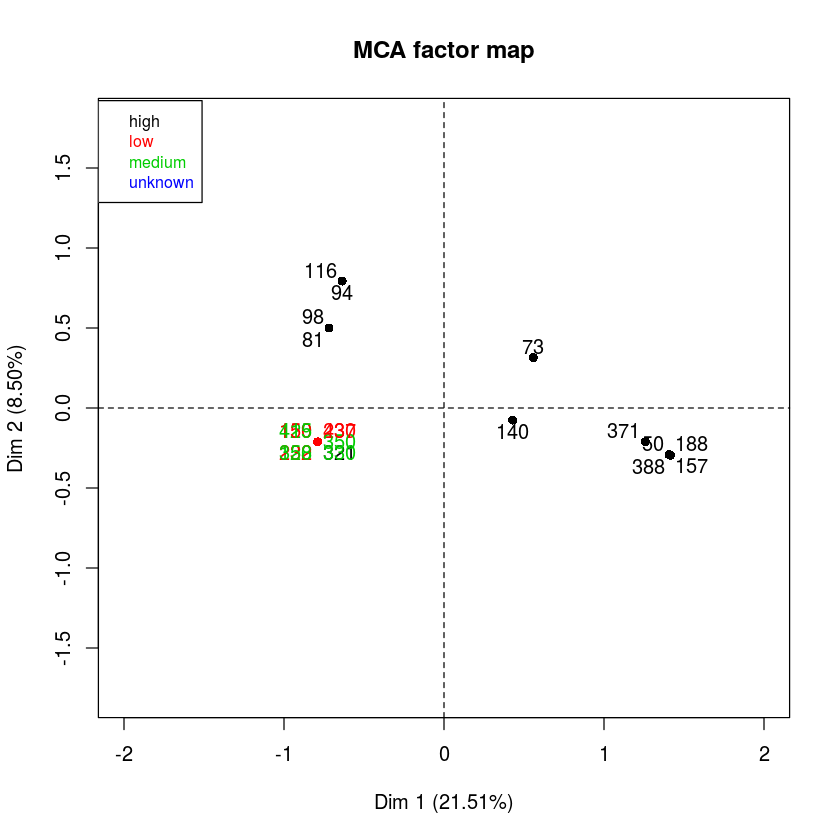

In [3]:
plot(mca,choix="ind",habillage="verb.noun.ratio",invisible=c("var","quali.sup"),
     select=knownratios,unselect=1,xlim=c(-2,2),ylim=c(-1,1))

In [53]:
mca$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X83A,0.8250517,0.33339703,0.070749164,0.001764594,0.009530297
X85A,0.8586356,0.45666361,0.436317181,0.175295722,0.141229643
X86A,0.7435825,0.23918379,0.003434569,0.022687102,0.182530344
X90A,0.6995472,0.09000765,0.475280323,0.561018711,0.612772649
X94A,0.7450876,0.41163102,0.340603137,0.373435640,0.166462109


In [12]:
mca$var$contrib

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
1 OV,24.423870104,2.5404156,2.750821e-26,0.000000e+00,2.5404156
2 VO,25.208582731,0.5503458,3.616296e-27,1.297846e-28,0.5503458
3 No dominant order,0.367547165,46.9092385,4.376552e-25,1.104209e-27,46.9092385
1 Postpositions,23.942077938,1.3910034,2.973340e-01,1.972177e-01,1.3910034
2 Prepositions,25.709164416,1.2133293,1.164454e+00,2.044130e+00,1.2133293
3 Inpositions,0.090222604,29.2014268,3.526213e+01,5.529569e+00,29.2014268
4 No dominant order,0.255941495,6.2137411,1.499196e+00,8.065072e+01,6.2137411
5 No adpositions,0.002593548,11.9804995,6.177688e+01,1.157836e+01,11.9804995


In [6]:
mca$var$coord

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X83A_1 OV,1.16601598,-0.10397028,-0.038080956,-0.0238109831,0.10317858
X83A_2 VO,-0.74008272,-0.14048160,-0.070866036,0.0007547918,-0.04110008
X83A_3 No dominant order,-0.06697557,2.63849820,1.213901745,0.1844359173,-0.31687941
1 Postpositions,1.15175150,-0.07687806,0.006247163,-0.0100106158,0.10770545
2 Prepositions,-0.79769386,-0.19403048,-0.105924670,0.0264723687,0.03157445
3 Inpositions,0.56598143,-0.35723195,4.183667723,4.1271693044,-4.20346041
4 No dominant order,-0.02651747,1.41257313,1.968825829,-1.1678415931,-0.21719339
5 No adpositions,0.29246384,4.62488077,-3.291598052,1.4759242697,-1.82870097
X86A_1 Genitive-Noun,0.95430755,-0.02025734,0.060415186,0.0027991669,-0.04415501
X86A_2 Noun-Genitive,-0.81281490,-0.23561202,-0.037652756,0.0753929720,-0.18359425


In [54]:
example6[c(116,94,81,98,321),]['Name']

,Name
116,German
94,Dutch
81,Czech
98,English
321,Polish


In [5]:
example6[c(188,157,50,388,371),]['Name']

,Name
188,Korean
157,Japanese
50,Basque
388,Tamil
371,Telugu


In [55]:
length(which(example6$verb.noun.ratio != 'unknown'))

[1] 22

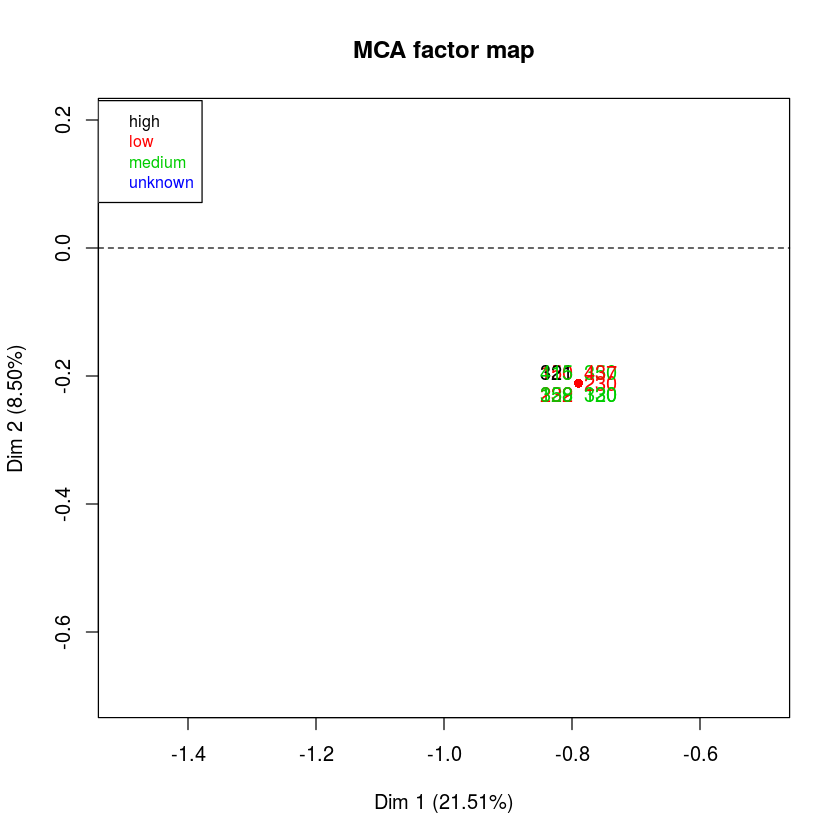

In [56]:
plot(mca,choix="ind",habillage="verb.noun.ratio",invisible=c("var","quali.sup"),
     select=knownratios,unselect=1,xlim=c(-1.5,-0.5),ylim=c(-0.5,0))

So using only dominant features, we get all the medium and low languages exactly at the same place. What does this mean?

In [57]:
example6[which(!(example6$verb.noun.ratio %in% c('high','unknown'))),'Name']

[1] Greek (Modern)    Hebrew (Modern)   Irish             Malagasy         
 [5] Maori             Romanian          Spanish           Swahili          
 [9] Vietnamese        Zapotec (Isthmus)
438 Levels: Abipón Abkhaz Abun Acehnese Acholi Adioukrou Ainu Akha ... Zulu

In [58]:
mca$ind$coord[which(!(example6$verb.noun.ratio %in% c('high','unknown'))),]

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
120,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
129,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
150,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
230,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
232,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
330,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
350,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
358,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
415,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782
437,-0.7897666,-0.2112722,-0.09322273,0.04588996,-0.05330782


I suppose all the non-high v/n ratio language have the same values for these features:

In [64]:
example6[which(!(example6$verb.noun.ratio %in% c('high','unknown'))),c('Name','verb.noun.ratio','X83A','X85A','X86A','X90A' ,'X94A')]

,Name,verb.noun.ratio,X83A,X85A,X86A,X90A,X94A
120,Greek (Modern),medium,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
129,Hebrew (Modern),medium,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
150,Irish,low,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
230,Malagasy,low,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
232,Maori,low,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
330,Romanian,medium,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
350,Spanish,medium,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
358,Swahili,medium,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
415,Vietnamese,medium,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word
437,Zapotec (Isthmus),low,2 VO,2 Prepositions,2 Noun-Genitive,1 Noun-Relative clause,1 Initial subordinator word


Any thoughts?


## How to Classify the WO Features?

I can think of two basic strategies:
    
    1. by POS: 
        - concerning verbs, e.g "order of subject and verb" (82A)
        - concerning nouns e.g "order of numeral and noun" (89A) 
        etc.
    
    2. by syntactic level: 
        - within phrase, e.g "order of negative morpheme and verb" (143A)
        - within clause/sentece e.g "order of object and verb" (83A)
        - above the clause, e.g "order of adverbial subordinator and clause" (94A)

(both would yield overlapping sets by the way)

## How to Assess the two classifications?

You already suggested two basic strategies:
    
    1. by heterogenous sets:
    
        - generate feature sets that contain a balanced mix of the subclasses
        - for those sets whose v/n ratio silhoutte is high, ask which are the features with high eta2
        - average as above and see if there is a dominantly informative subclass
    
    2. by homogenous sets:
        
        - generate feature sets containing features from a single subclass
        - compare the average the silhuettes of these sets by subclass

But a few questions come to mind:
    
    1. any other ideas?
    
    2. if one or two distinctly informative subclass, e.g "features pertaining to negation" are found, do you say QED?
    
    3. if not, what do you say then?

## 85A, 83A, 86A + Negation Features

In [28]:
# silhouette:  0.1
# quality: 3.65
# known v/n ratio: 27
example7 <- read.csv('chunked-feature-sets/83A-85A-86A-143A-144A.csv')
knownratios = which(example7$verb.noun.ratio != 'unknown')
mca <- MCA(example7,quali.sup=1:12)

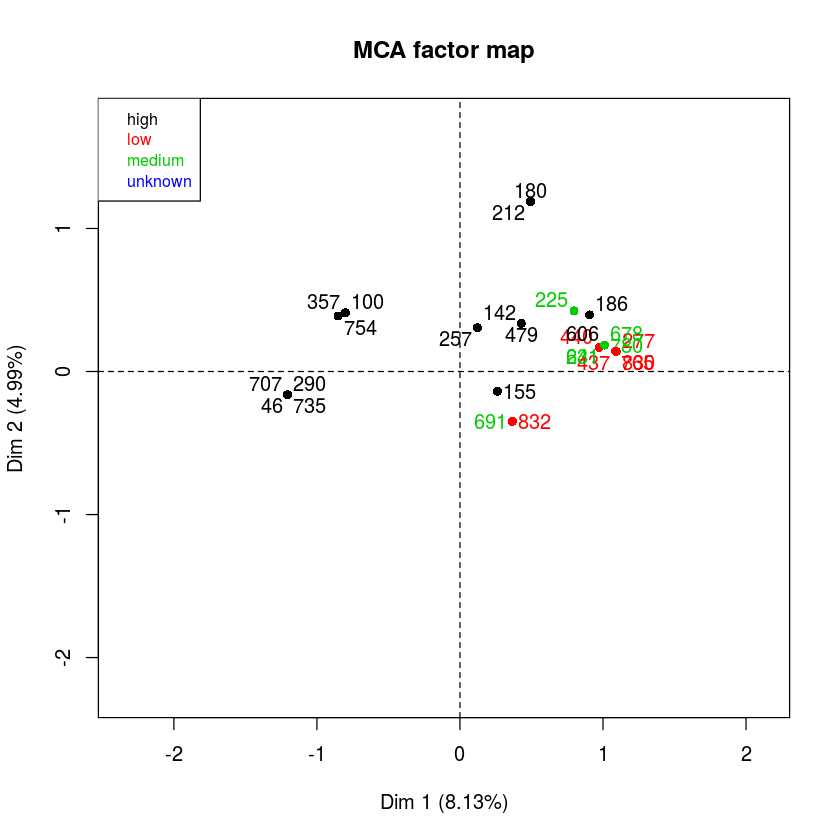

In [29]:
plot(mca,choix="ind",habillage="verb.noun.ratio",invisible=c("var","quali.sup"),
     select=knownratios,unselect=1)

In [30]:
mca$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X83A,0.8195627,0.05522070,0.049190619,0.13224551,0.008065546
X85A,0.8192870,0.01343938,0.038170799,0.04902655,0.004421934
X86A,0.6727019,0.02950739,0.001314697,0.02636891,0.016612006
X143A,0.3169858,0.93915499,0.935789387,0.82423866,0.939349926
X144A,0.6240112,0.95758260,0.943429805,0.90076184,0.942332258


In [31]:
which(example7$Name %in% c('Polish','Czech'))

[1] 155 606

In [7]:
# sihouette: -0.04
# quality: 3.2
# known v/n ratio: 27
example8 <- read.csv('chunked-feature-sets/83A-85A-86A-143A.csv')
knownratios = which(example8$verb.noun.ratio != 'unknown')
mca <- MCA(example8,quali.sup=1:12)

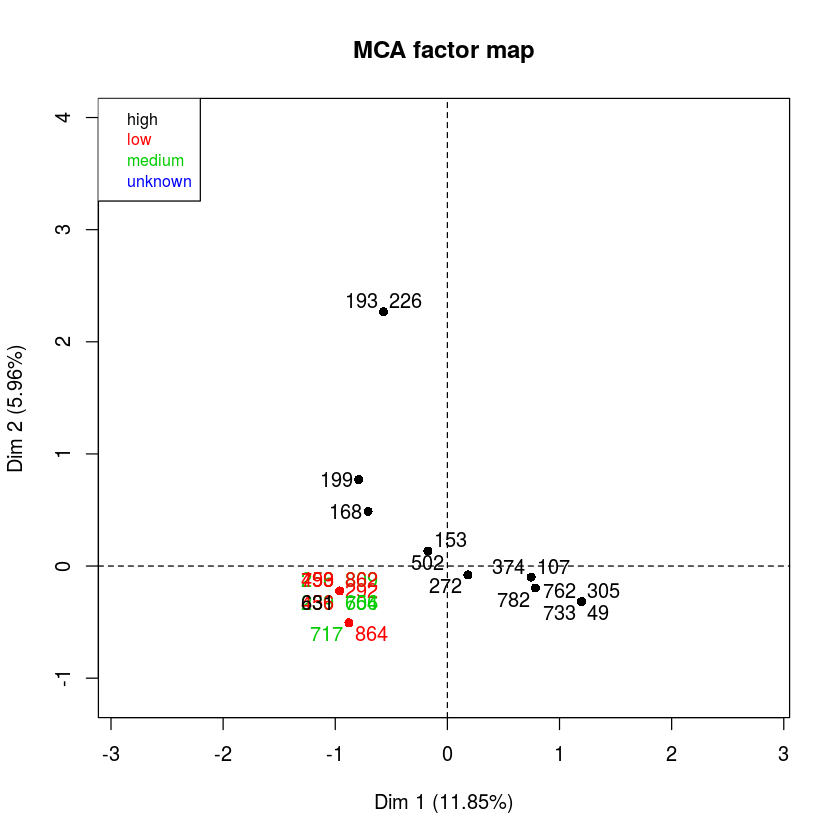

In [8]:
plot(mca,choix="ind",habillage="verb.noun.ratio",invisible=c("var","quali.sup"),
     select=knownratios,unselect=1)

In [9]:
mca$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X83A,0.8245800,0.4425027,0.003175937,0.1458651,0.01058734
X85A,0.8789827,0.2859295,0.599811763,0.2859649,0.56755036
X86A,0.7556684,0.3440103,0.011501436,0.1069740,0.02300708
X143A,0.2671031,0.2988611,0.563438101,0.5848825,0.49256189


In [14]:
example8[631,'Name']

[1] Polish
870 Levels: Aari Abau Abipón Abkhaz Abui Abun Acehnese Achagua Acholi ... Zuni

In [33]:
which(example8$Name %in% c('Polish','Czech'))

[1] 168 631

In [10]:
# sihouette: 0.16
# quality: 3.5
# known v/n ratio: 27
example9 <- read.csv('chunked-feature-sets/83A-85A-86A-144A.csv')
knownratios = which(example9$verb.noun.ratio != 'unknown')
mca <- MCA(example9,quali.sup=1:12)

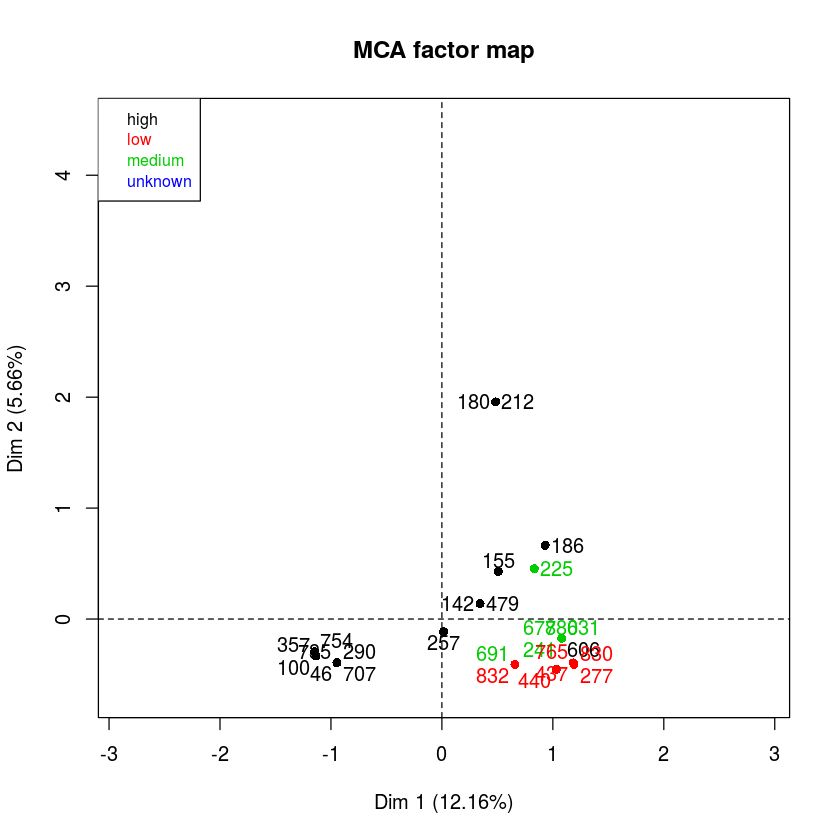

In [11]:
plot(mca,choix="ind",habillage="verb.noun.ratio",invisible=c("var","quali.sup"),
     select=knownratios,unselect=1)

In [12]:
mca$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X83A,0.8560038,0.4129726,0.2255776,0.01191641,0.023208925
X85A,0.8697770,0.2046117,0.2361477,0.57885896,0.512960938
X86A,0.7222981,0.2492035,0.2622594,0.03665618,0.003103047
X144A,0.5911584,0.5487478,0.5389369,0.52667183,0.559757281


In [13]:
example9[606,'Name']

[1] Polish
837 Levels: Aari Abau Abipón Abkhaz Abui Abun Achagua Acholi Adang ... Zuni

Aha! Maybe this can be an interesting test case. See for example:

    https://scholar.harvard.edu/adam/files/polish_optional_movement.pdf


It seems linguists more or less classify it as head-initial, this is probably why Polinsky **unnaturally assigned** it to the high ratios rather than the mediums. But we see it consistently groups with the medium and lows.

or see the bottom of this book page:

    https://books.google.co.il/books?id=tcFuPYyBERwC&pg=PR15&lpg=PR15&dq=head+parameter+value+in+Polish&source=bl&ots=-XXrVk_n1G&sig=ARigK5I9BZv39k_U7KbWi1w1Bko&hl=en&sa=X&ved=0ahUKEwjbsei4nv7UAhVkJ8AKHeVFBBAQ6AEIRTAG#v=onepage&q=head%20parameter%20value%20in%20Polish&f=false
    
  
It seems Polish indeed poses a problem to the head parameter paradigm, along with Russian. Maybe it could be interesting to check the v/n ratio in Russian (not included in Polinsky's list). Whereas Czech, another slavic language, falls more squarely in the high category and groups accordingly.

In [8]:
example10 <- read.csv('chunked-feature-sets/83A-85A.csv')
knownratios = which(example10$verb.noun.ratio != 'unknown')
mca <- MCA(example10,quali.sup=1:12)

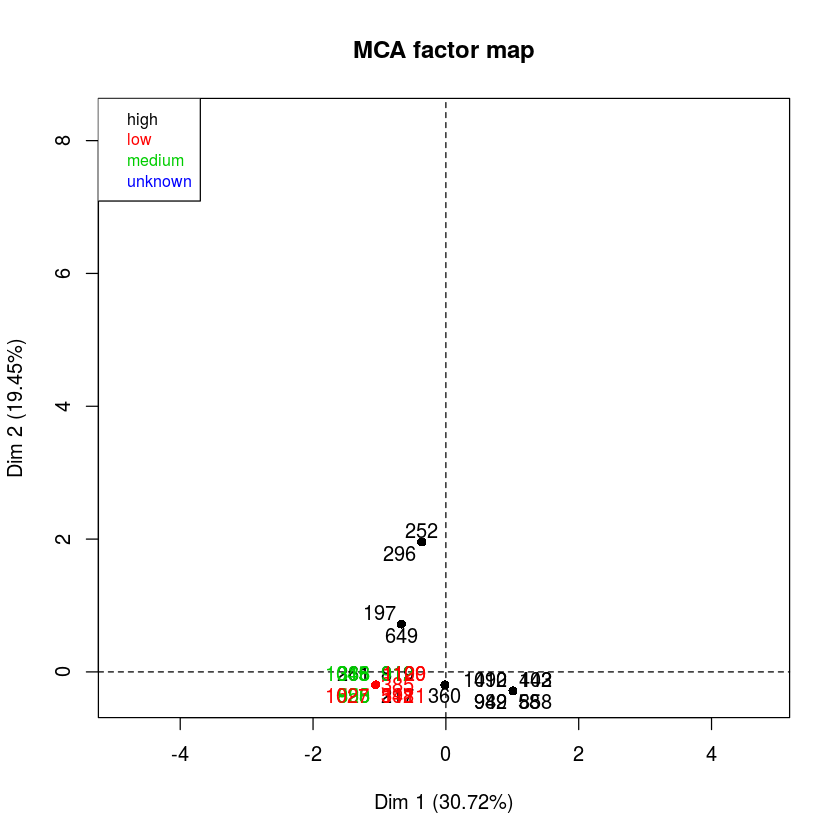

In [9]:
plot(mca,choix="ind",habillage="verb.noun.ratio",invisible=c("var","quali.sup"),
     select=knownratios,unselect=1)

In [10]:
mca$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X83A,0.9215965,0.5835286,4.687797e-27,1.233994e-29,0.4164714
X85A,0.9215965,0.5835286,1.000000e+00,1.000000e+00,0.4164714


In [11]:
mca$var

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
1 OV,0.98850031,-0.2536779,-2.443517e-14,0.000000e+00,0.21431083
2 VO,-0.97896850,-0.1150994,-8.636566e-15,1.636140e-15,0.09723766
3 No dominant order,0.35268423,3.1704388,2.834720e-13,-1.423868e-14,-2.67843341
1 Postpositions,0.95056469,-0.1823163,-7.802569e-02,-6.354601e-02,-0.15402351
2 Prepositions,-1.05042697,-0.1815816,-1.646636e-01,-2.181679e-01,-0.15340283
3 Inpositions,0.51582582,7.3842793,-7.511286e+00,-2.974443e+00,6.23834797
4 No dominant order,-0.30994414,1.2152072,5.525313e-01,4.052582e+00,1.02662494
5 No adpositions,-0.04224555,2.2847145,4.802434e+00,-2.079083e+00,1.93016046
,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
1 OV,24.423870104,2.5404156,2.750821e-26,0.000000e+00,2.5404156
